In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_Train = pd.read_csv('train.csv')
data_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Context

<table>
<tr><td>Variable</td><td>Definition</td><td>Key</td></tr>
<tr><td>survival</td><td>urvival</td><td>0 = No, 1 = Yes</td></tr>
<tr><td>pclass</td><td>Ticket class</td><td>1 = 1st, 2 = 2nd, 3 = 3rd</td></tr>
<tr><td>sex</td><td>Sex</td><td></td></tr>
<tr><td>Age</td><td>Age in years</td><td></td></tr>
<tr><td>sibsp</td><td># of siblings / spouses aboard the Titanic</td><td></td></tr>	
<tr><td>parch</td><td># of parents / children aboard the Titanic</td><td></td></tr> 	
<tr><td>ticket</td><td>Ticket number</td><td> </td></tr>	
<tr><td>fare</td><td>Passenger fare </td><td></td></tr>	
<tr><td>cabin</td><td>Cabin number</td><td> </td></tr>	
<tr><td>embarked</td><td>Port of Embarkation</td><td>C = Cherbourg, Q = Queenstown, S = Southampton</td></tr></table>

Survival, Pclass, Sex, Embarked are discrete categorial variables 
SibSp, Parch are categorial ordinal variables
Age, Fare are numerical variables 
Ticket, Cabin variables will be not used for analysis

Each person represent one observation in this dataset

In [42]:
data_Train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [43]:
#The train data set has 100000 observation and 10 variables in the data set.
data_Train.shape

(100000, 12)

# Data quality assessment

In [44]:
#Delete duplicates
data_Train = data_Train.drop_duplicates()
data_Train.shape
 

(100000, 12)

In [45]:

"""data_Train.head()"""
#for x in data_Train.iterrows():
#    print(x)
#data_Train['Sex_Age'] = 0 if data_Train[(data_Train['Sex'] == 'male') & (data_Train['Age'] > 18)] else 1 if data_Train[(data_Train['Sex'] == 'female') & (data_Train['Age'] > 18)] else 2
data_Train['Sex_Age'] = [0 if (x[1].Sex == 'male') & (x[1].Age >= 18) else 1 if (x[1].Sex == 'female') & (x[1].Age >= 18) else 2 if (x[1].Sex == 'male') else 3 for x in data_Train.iterrows()]
# Male + Age >= 18 == 0
# Female + Age >= 18 == 1
# Male + Age < 18 == 2
# Female + Age < 18 == 3

In [46]:
data_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Age
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,2
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,2
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,2
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,0
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,0


In [47]:

data_Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Age
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000,100000.000000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933,0.743040
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882,0.901709
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000,0.000000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000,0.000000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000,1.000000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000,1.000000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000,3.000000


1. Handling missing value

In [48]:
data_Train.isnull().mean() * 100
# Calculate the percentage for missing values

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age             3.292
SibSp           0.000
Parch           0.000
Ticket          4.623
Fare            0.134
Cabin          67.866
Embarked        0.250
Sex_Age         0.000
dtype: float64

In [49]:
# Variables Ticket and Cabin will be not used for analisys because there are not a categorial and not a numerical variables, remove them from dataset
data_Train = data_Train.drop(columns=['Ticket','Cabin','PassengerId'])


In [50]:
#Check for missing value in any column
pd.isna(data_Train).sum()


Survived       0
Pclass         0
Name           0
Sex            0
Age         3292
SibSp          0
Parch          0
Fare         134
Embarked     250
Sex_Age        0
dtype: int64

In [51]:
#1. The column "Age" has 3292 missing data, filling them with median or mean can distort the result of analisys. Drop rows
data_Train.dropna(subset = ["Age"], axis = 0, inplace = True)
data_Train.reset_index(drop=True, inplace=True)

#2. Replace NaN values in Fare columns using mean for each Pclass

for x in data_Train['Pclass'].unique().tolist():
    Fare_mean = data_Train[data_Train['Pclass']==x]['Fare'].mean()
    data_Train.loc[data_Train['Pclass']==x,'Fare'] = data_Train.loc[data_Train['Pclass']==x,'Fare'].replace(to_replace=np.nan,value=Fare_mean)


#3. Replace NaN values in Categorial column using mode
Embarked_mode = data_Train['Embarked'].mode().values[0]
data_Train['Embarked'] = data_Train['Embarked'].replace(to_replace=np.nan,value=Embarked_mode)


In [52]:
data_Train.shape

(96708, 10)

In [53]:
pd.isna(data_Train).sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Sex_Age     0
dtype: int64

2. Handling Outlier

In [54]:
data_Train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Age
count,96708.000000,96708.000000,96708.000000,96708.000000,96708.000000,96708.000000,96708.000000
mean,0.428279,2.106206,38.355472,0.398240,0.455278,43.938875,0.685931
std,0.494832,0.837841,18.313556,0.863834,0.951705,69.504833,0.856381
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000,0.000000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.490000,0.000000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.532500,1.000000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000,3.000000


In [55]:
unique_Name = len(data_Train['Name'].unique())
print(unique_Name)

89284


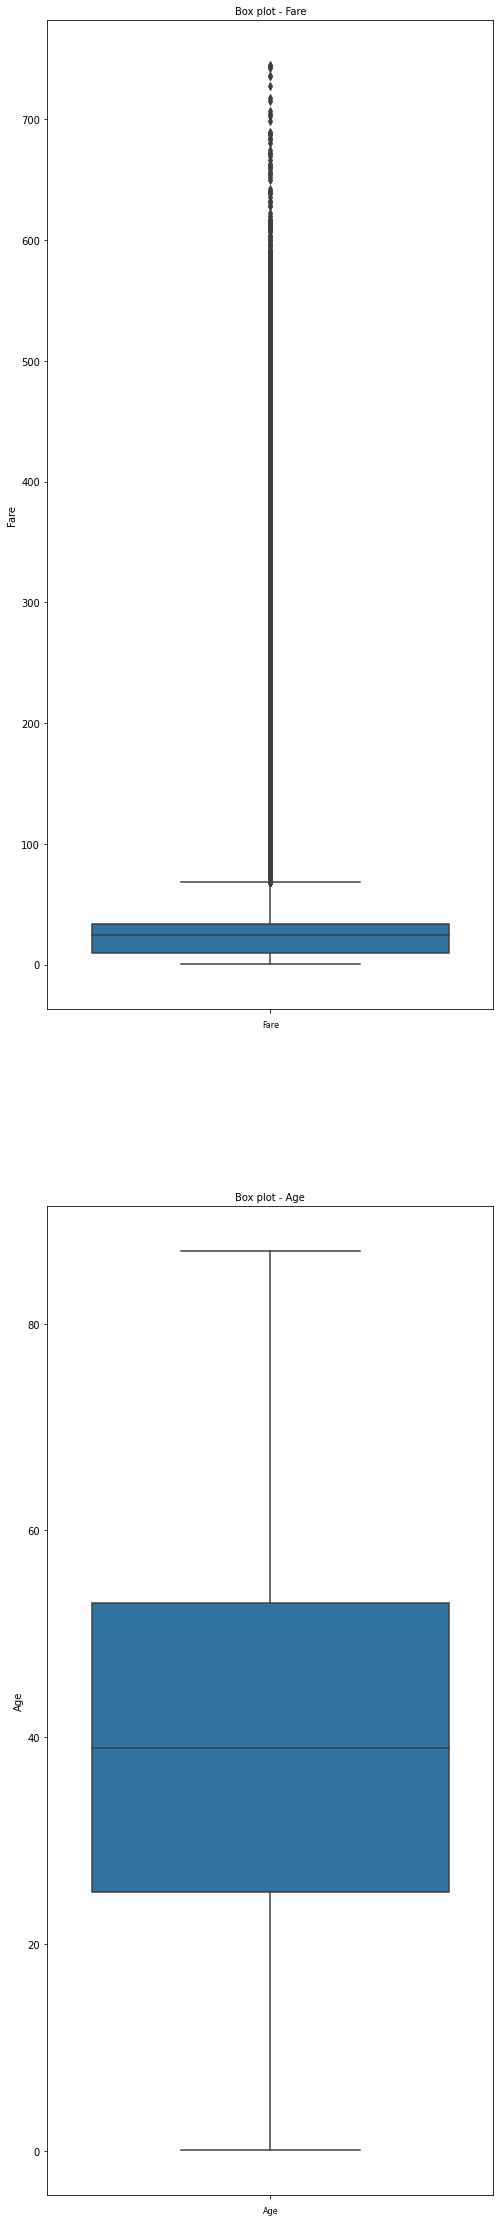

In [56]:
col_names = ['Fare','Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data_Train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [57]:
# Variable 'Age' has no outliers

In [58]:
#1. Fare
#Detect outliers by using IQR
Q1 = data_Train['Fare'].quantile(0.25)
Q3 = data_Train['Fare'].quantile(0.75)
IQR = Q3 - Q1
#Data set with outliers
print(Q1)
print(Q3)
data_Train.shape

10.04
33.5325


(96708, 10)

In [59]:
#Data set without outliers
data_Train = data_Train[~((data_Train['Fare'] < (Q1 - 1.5 * IQR)) | (data_Train['Fare'] > (Q3 + 1.5 * IQR)))]
data_Train.shape

(80080, 10)

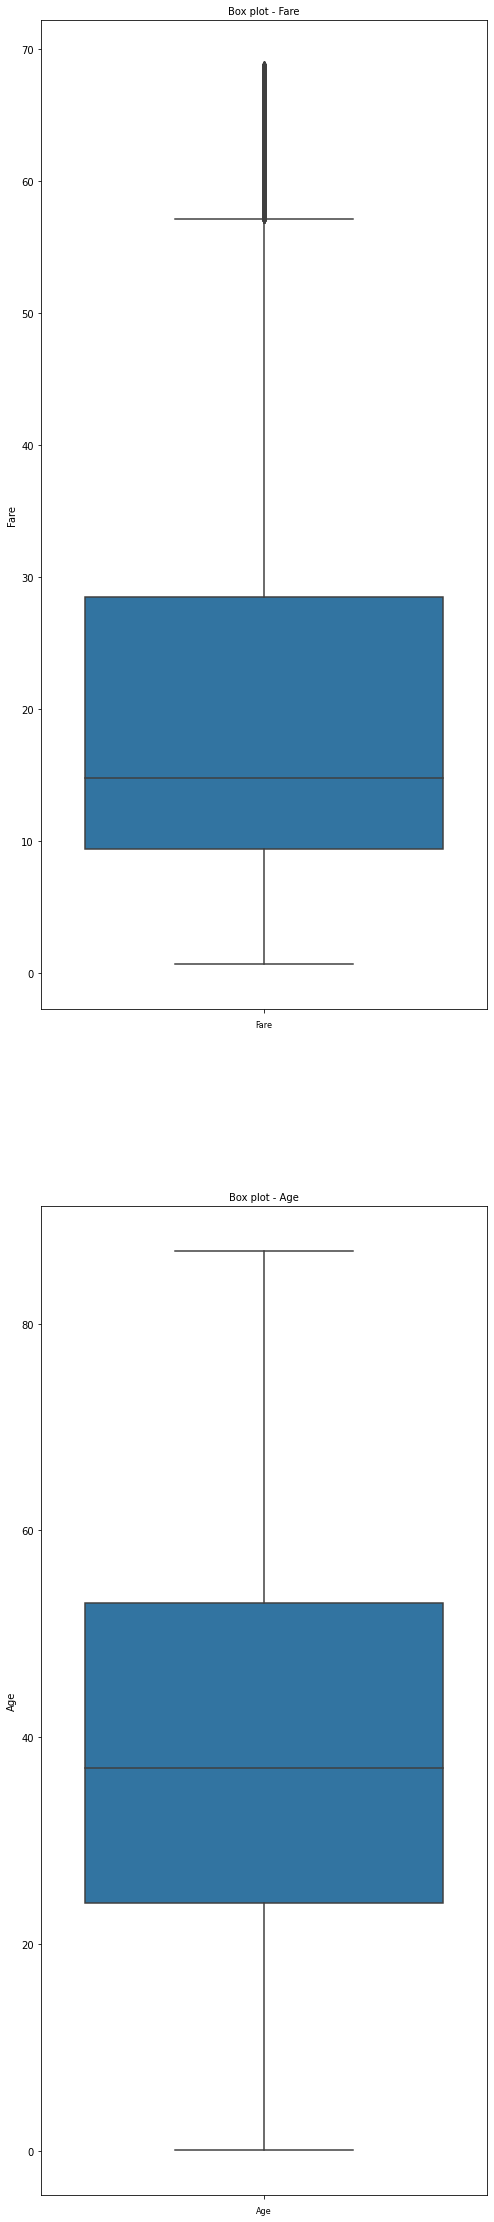

In [60]:
# Boxplot

col_names = ['Fare','Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data_Train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# Data exploration

<b>1. Univariate Analysis</b>

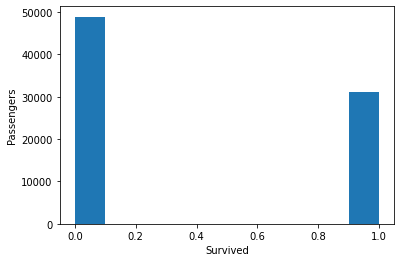

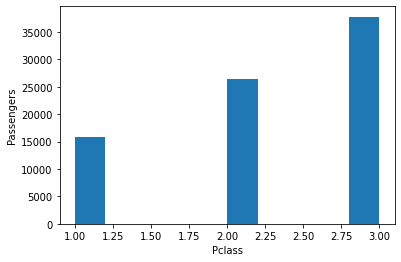

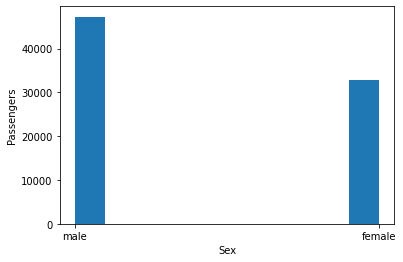

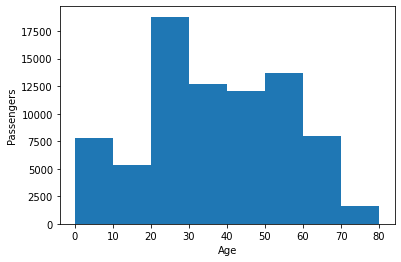

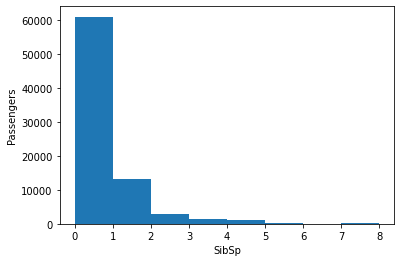

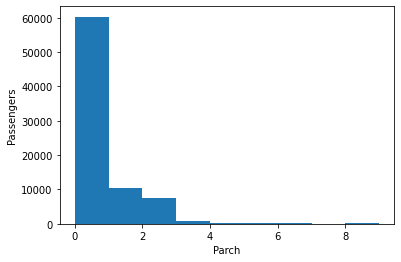

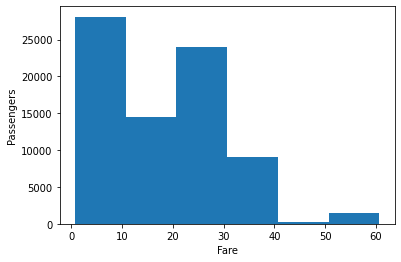

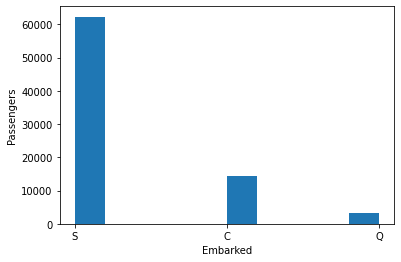

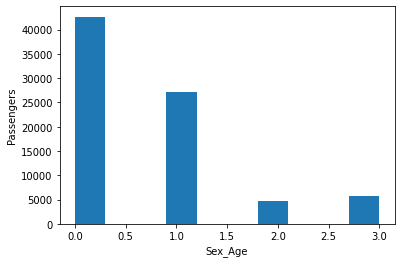

In [61]:
#fig, ax = plt.subplots(1, 1)
#plt.hist(data_Train['Age'])
#plt.hist(data_Train['Pclass'])

col_names = [x for x in data_Train.columns if x not in ['PassengerId','Name']]
for i in col_names:
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel(i)
    ax.set_ylabel('Passengers')
    if i in ['Age','Fare']:
        data = data_Train[i]
        bins = np.arange(min(data), max(data) + 1, 10)
        plt.hist(data_Train[i],bins=bins)
    elif i in ['SibSp', 'Parch']:
        data = data_Train[i]
        bins = np.arange(min(data), max(data) + 1, 1)
        plt.hist(data_Train[i],bins=bins)
    else:
        plt.hist(data_Train[i])
    plt.show()

<b>2. Bivariate Analysis</b>

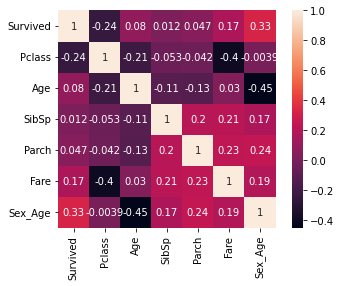

In [62]:
corr = data_Train.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Spearman Correlation')

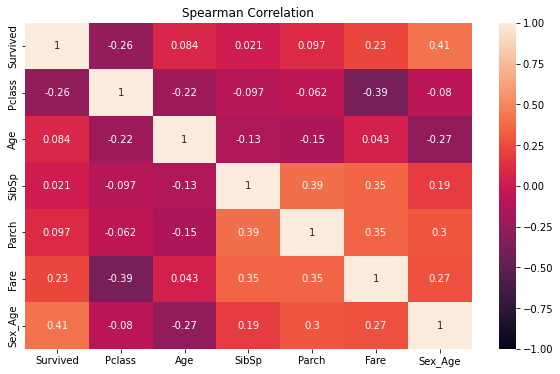

In [63]:
corr = data_Train.corr(method="spearman")
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.title("Spearman Correlation")

In [64]:
#variables Survived,Pclass is discrete variable, replace with key values
data_Train['Survived'] = data_Train['Survived'].replace(to_replace=0, value='No')
data_Train['Survived'] = data_Train['Survived'].replace(to_replace=1, value='Yes')
data_Train['Survived'] = data_Train['Survived'].astype(object)

data_Train['Pclass'] = data_Train['Pclass'].replace(to_replace=1, value='Upper')
data_Train['Pclass'] = data_Train['Pclass'].replace(to_replace=2, value='Middle')
data_Train['Pclass'] = data_Train['Pclass'].replace(to_replace=3, value='Lower')
data_Train['Pclass'] = data_Train['Pclass'].astype(object)

data_Train['Sex_Age'] = data_Train['Sex_Age'].replace(to_replace=0, value='Men')
data_Train['Sex_Age'] = data_Train['Sex_Age'].replace(to_replace=1, value='Women')
data_Train['Sex_Age'] = data_Train['Sex_Age'].replace(to_replace=2, value='Boys')
data_Train['Sex_Age'] = data_Train['Sex_Age'].replace(to_replace=3, value='Girls')
data_Train['Sex_Age'] = data_Train['Sex_Age'].astype(object)



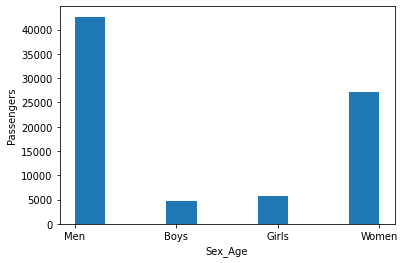

In [65]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(i)
ax.set_ylabel('Passengers')
plt.hist(data_Train['Sex_Age'])
plt.show()

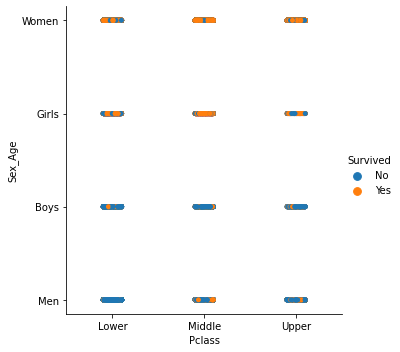

In [66]:
sns.catplot( x="Pclass", y="Sex_Age",hue="Survived", data=data_Train)

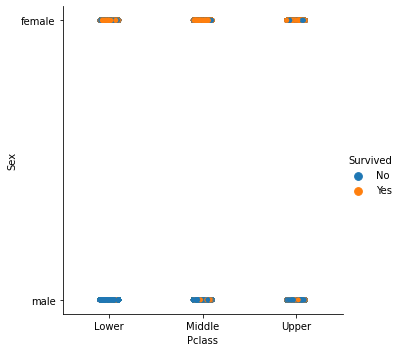

In [67]:
sns.catplot( x="Pclass", y="Sex",hue="Survived", data=data_Train)

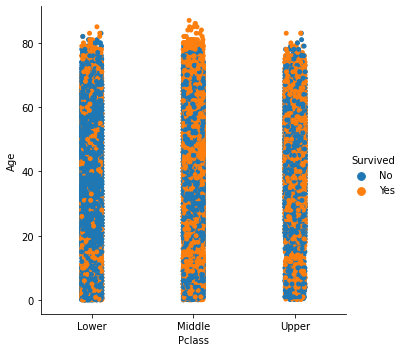

In [68]:
sns.catplot( x="Pclass", y="Age",hue="Survived", data=data_Train)

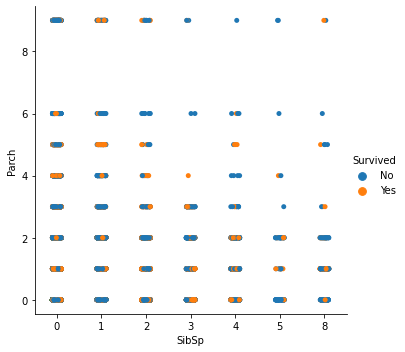

In [69]:
sns.catplot(x='SibSp', y='Parch', hue='Survived', data=data_Train)

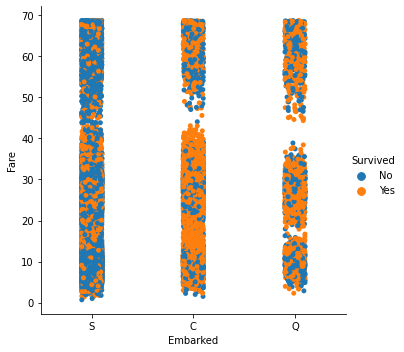

In [70]:
sns.catplot(x='Embarked', y='Fare', hue='Survived', data=data_Train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

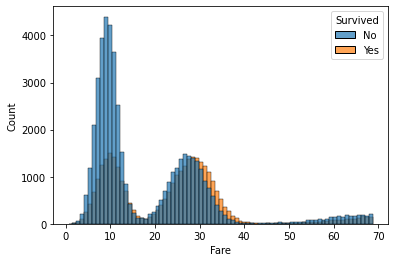

In [71]:
sns.histplot(data = data_Train
            ,x = 'Fare'
            ,alpha = .7
            ,hue = 'Survived'
            )

<AxesSubplot:xlabel='Sex_Age', ylabel='Count'>

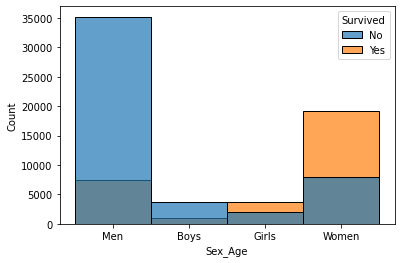

In [72]:
sns.histplot(data = data_Train
            ,x = 'Sex_Age'
            ,alpha = .7
            ,hue = 'Survived'
            )

<AxesSubplot:xlabel='Sex', ylabel='Count'>

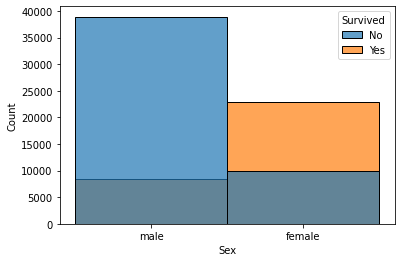

In [73]:
sns.histplot(data = data_Train
            ,x = 'Sex'
            ,alpha = .7
            ,hue = 'Survived'
            )

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

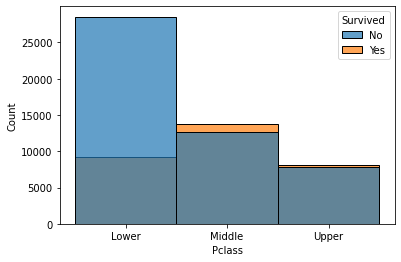

In [74]:
sns.histplot(data = data_Train
            ,x = 'Pclass'
            ,alpha = .7
            ,hue = 'Survived'
            )

# Summary

Согласно тепловой карте корреляции стоимость билета обратно коррелировано классу билета.  На корабле выжило больше женщим чем мужчин, больше всего выжило пассажиров со второго класса, больше всего погибло мужчин с третьего класса. Больше всего погибло пассажиров со стоимостью билета 5-15 долларов. Больше всего выживших с портом прибытия "С"